# ASD Children traits - Analysis

This Notebook contains an evaluation of the dataset.  The primary goal is to find answers for unknown questions: **What can we learn from this data?**

## Loading data
First we'll import required libraries and import the data to a Pandas DataFrame:

In [1]:
from scipy import stats
import altair as alt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./assets/data_csv.csv', header=0, sep=',')

In [3]:
df.shape

(1985, 28)

In [4]:
df.describe()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Childhood Autism Rating Scale
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1976.000000,1985.000000,1946.000000,1985.000000
mean,993.000000,0.299244,0.238287,0.213098,0.272040,0.278589,0.306297,0.345088,0.243829,0.259950,0.446348,3.074393,9.624685,4.234841,1.701763
std,573.164462,0.458042,0.426143,0.409600,0.445123,0.448418,0.461071,0.475517,0.429499,0.438717,0.497238,3.680263,4.302416,2.898247,1.015367
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,497.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,1.000000
50%,993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,4.000000,1.000000
75%,1489.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000,14.000000,6.000000,2.000000
max,1985.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,18.000000,10.000000,4.000000


And now let's take a look on the columns and see what data is available to us:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

## Understanding the data

We have 28 columns at our disposal and most of them seems to be self-explanatory.  However, there are a few that are specific to the test used to generate the data so we need some research to know what they mean.

We'll take a detour now to try and figure out their meaning as the [dataset's Kaggle page](https://www.kaggle.com/datasets/uppulurimadhuri/dataset) has not enough information about it.

### The AQ-10 test
The AQ-10 test is a short test that can be used for primary care practioneers to see if a child should be referred to an autism treatment.  Initially designed for self-report from adults, it can be answered by parents and professionals as an initial screening for children.  According to a study from Cambridge University, it's not reliable enough to be the sole clinical diagnosis tool but it's a way to initiate screening.

Altough it's not explicit on the dataset, we might be able to link the column questions as such:

- A1: S/he often notices small sounds when others do not
- A2: S/he usually concentrates more on the whole picture, rather than the small details
- A3: In a social group, s/he can easily keep track of several different people’s conversations
- A4: S/he finds it easy to go back and forth between different activities
- A5: S/he doesn’t know how to keep a conversation going with his/her peers
- A6: S/he is good at social chit-chat
- A7: When s/he is read a story, s/he finds it difficult to work out the character’s intentions or feelings
- A8: When s/he was in preschool, s/he used to enjoy playing games involving pretending with other children
- A9: S/he finds it easy to work out what someone is thinking or feeling just by looking at their face 
- A10: S/he finds it hard to make new friends

#### Scoring
Only 1 point can be scored for each question. Score 1 point for Definitely or Slightly Agree on each of items 1, 5, 7 and 10. Score 1 point for Definitely or Slightly Disagree on each of items 2, 3, 4, 6, 8 and 9. If the individual scores 6 or above, the responder should consider referring them for a specialist diagnostic assessment.

#### Linking the test to the Dataset
With the prior information, we can assume the following columns are directly derived from the AQ-10 test:

- A1, A2, A3, A4, A5, A6, A7, A8, A9, A10_Autism_Spectrum_Quotient:  Answers for each question;
- Qchat_10_Score:  The final score from the answers;

Let's analyse these columns:

In [6]:
# Select only the columns that we're evaluating at the moment
df_test = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Qchat_10_Score']]

# Check their datatypes
df_test.dtypes

A1                                int64
A2                                int64
A3                                int64
A4                                int64
A5                                int64
A6                                int64
A7                                int64
A8                                int64
A9                                int64
A10_Autism_Spectrum_Quotient      int64
Qchat_10_Score                  float64
dtype: object

In [7]:
# All the answers and the overall score are numeric, which should be expected from the #Scoring section.  Let's take a look at some statistics:
df_test.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Qchat_10_Score
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1946.000000
mean,0.299244,0.238287,0.213098,0.272040,0.278589,0.306297,0.345088,0.243829,0.259950,0.446348,4.234841
std,0.458042,0.426143,0.409600,0.445123,0.448418,0.461071,0.475517,0.429499,0.438717,0.497238,2.898247
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


There are **no null values** which indicates that all questions were mandatory and a score was only issued after the test was complete.

Also, the *min* and *max* values are respectivelly 0 and 1, which is expected as they are the only possible values:  either the answer awards a point (1) or it does not (0).  Let's confirm this:

In [8]:
alt.data_transformers.enable('default', max_rows=None)

# Let's remove the score and create a new Dataframe with two columns: one indicates the question (column_name) and other, the score for that row (value)
df_to_plot = df_test[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient']].melt(var_name='column_name', value_name='row_score')

# Now we group by those columns and count the amount of occurrences for each value
grouped_data = df_to_plot.groupby(['column_name', 'row_score']).size().reset_index(name='count')

# And we plot it
alt.Chart(grouped_data).mark_bar().encode(
    x='column_name:N',
    y='count:Q',
    color='row_score:N'
).properties(width=600, height=200)

alt.Chart(...)

We also have some categorical data.  Let's take a look at individual columns and their respective values:

- Speech Delay/Language Disorder
- Learning disorder
- Genetic_Disorders
- Depression
- Global developmental delay/intellectual disability
- Social/Behavioural Issues
- Anxiety_disorder
- Sex
- Ethnicity
- Jaundice
- Family_mem_with_ASD
- Who_completed_the_test
- ASD_traits

In [9]:
# Let's create a helper function to print the distinct values for each column
def print_domain_for_column(df, column_name):
    print(f'{column_name}: {df[column_name].dropna().unique()}')

print_domain_for_column(df, 'Speech Delay/Language Disorder')
print_domain_for_column(df, 'Learning disorder')
print_domain_for_column(df, 'Genetic_Disorders')
print_domain_for_column(df, 'Depression')
print_domain_for_column(df, 'Global developmental delay/intellectual disability')
print_domain_for_column(df, 'Social/Behavioural Issues')
print_domain_for_column(df, 'Anxiety_disorder')
print_domain_for_column(df, 'Sex')
print_domain_for_column(df, 'Ethnicity')
print_domain_for_column(df, 'Jaundice')
print_domain_for_column(df, 'Family_mem_with_ASD')
print_domain_for_column(df, 'Who_completed_the_test')
print_domain_for_column(df, 'ASD_traits')

Speech Delay/Language Disorder: ['Yes' 'No']
Learning disorder: ['Yes' 'No']
Genetic_Disorders: ['Yes' 'No']
Depression: ['Yes' 'No']
Global developmental delay/intellectual disability: ['Yes' 'No']
Social/Behavioural Issues: ['Yes' 'No']
Anxiety_disorder: ['Yes' 'No']
Sex: ['F' 'M']
Ethnicity: ['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']
Jaundice: ['Yes' 'No']
Family_mem_with_ASD: ['No' 'Yes']
Who_completed_the_test: ['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']
ASD_traits: ['No' 'Yes']


Most of the columns are simply "yes" or "no", which we can easily convert to numbers 1 and 0.  Same goes for sex, where we can convert values "F" and "M".

The exceptions are columns **"Who_completed_the_test"**, which we can use to look for a correlation between who answered the question and the overall score and column **"Ethnicity"**.  The latter is a subject all on its own as we could look for correlation between race/hieritage/birth place and ASD but that could raise some Ethical issues.  For the purposes of this analysis, we'll ignore this and focus on the other features.

In [10]:
df['Sex'] = df['Sex'].map({'F': 1, 'M': 0})
df = df.replace({'Yes': 1, 'No': 0})
del df['Ethnicity']

In [11]:
# Lastly, we'll handle the "Who_completed_the_test" column.  We'll keep it as categorical data for now so we need to let Pandas know:
df['Who_completed_the_test'] = df['Who_completed_the_test'].astype('category')

# Let's take a look at our data:
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,1.0,1,1.0,1,1,1,1,0,Family Member,0
1,2,1,1,0,0,0,1,1,0,0,...,1.0,1,1.0,2,1,0,1,0,Family Member,1
2,3,1,0,0,0,0,0,1,1,0,...,1.0,1,1.0,4,1,0,1,0,Family Member,1
3,4,1,1,1,1,1,1,1,1,1,...,1.0,1,1.0,2,1,0,0,0,Family Member,1
4,5,1,1,0,1,1,1,1,1,1,...,1.0,1,1.0,1,1,1,0,0,Family Member,1


## Analysing data

Let's start with a statistical analysis:  Do the person who completed the test influences its score?

### T-Test
To do that, we'll use a t-test (or student t). To simplify the results, we'll group our cathegories into two:
- Family, to represent people that are closer to the test subject (values 'Self' and 'Family member');
- Others, to represent professionals that, although working with the subject are not considered "close" (values 'Health Care Professional', 'Others' and 'School and NGO');

And now we formulate our two hypothesis:

The null hypothesis is what we are trying to disprove.  So, in this scenario it would be *there is no significant difference between the mean AQ-10 test scores if answered by a family member or a professional*.

And the alternate hypothesis is *there is a statistically relevant difference between the mean scores for the AQ-10 test if answered by a family member or a professional*.

Let's dive into this:

In [12]:
# We select the columns that will be part of the study
scores = df['Qchat_10_Score']
responders = df['Who_completed_the_test']

# Create series for each group
group_family = scores[(responders ==  'Self') | (responders == 'Family member')]
group_professionals = scores[(responders ==  'Health Care Professional') | (responders == 'Others') | (responders == 'School and NGO')]

In [13]:
# Let's take a look at our first group, first we'll check for null values
print('Family Group')
print(f'Null values: {group_family.isna().sum()}')
print(f'Median: {group_family.median()}')

# And now we check some statistics for it.
group_family.describe()

Family Group
Null values: 0
Median: 4.5


count    62.000000
mean      4.838710
std       2.915159
min       1.000000
25%       2.000000
50%       4.500000
75%       7.000000
max      10.000000
Name: Qchat_10_Score, dtype: float64

In [14]:
# Let's do the same for the second group, first we'll check for null values
print('Health Care Professionals Group')
print(f'Null values: {group_professionals.isna().sum()}')
print(f'Median: {group_professionals.median()}')

# And now we check some statistics for it.
group_professionals.describe()

Health Care Professionals Group
Null values: 28
Median: 4.0


count    1237.000000
mean        4.126112
std         2.936811
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: Qchat_10_Score, dtype: float64

In [15]:
# We have 28 null values over 1237 samples, or 2.3% of the total.  Since it's not a lot of entries, we'll just drop them:
group_professionals = group_professionals.dropna()

In [16]:
# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(group_family, group_professionals)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 1.8650688170682725
P-value: 0.06239743653243921


Okay, let's evaluate these results.

We got a *t-statistic* value of **1.86**, which indicates that the mean of the first group (questionaires answered by family members) is higher than those of the first group.  However, we must consider the second part of our results, which is the *p-value*.

The p-value indicates the probability of observing the differences between the means by chance. A p-value smaller than a pre-defined significance level (usually 0.05) means that the difference is statistically relevant.

In our scenario, we got the value **0.06**, which means that this difference could have happened by random chance and we **cannot reject the null hypothesis**.

So, to answer our question:  _There is no difference if the questionaire was answered by a family member or a health care professional_.

### SPLOM
For our second question, we chose to select two features and see if they are correlated.  Even if we cannot prove causality, it will be interesting to see which features may increase or decrease together.

To do that, we can either just print the results with Pandas' `.corr()` function to show a matrix or use a SPLOM (Scatter Plot Matrix), displaying the correlations by any two features on a matrix.

In [17]:
df_to_plot = df[['A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
                 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues',
                 'Childhood Autism Rating Scale', 'Anxiety_disorder', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits']]

# Let's try the Pandas' approach first:
df_to_plot.corr()

,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Jaundice,Family_mem_with_ASD,ASD_traits
A10_Autism_Spectrum_Quotient,1.000000,0.216011,-0.162206,0.450834,0.296970,0.289166,0.281483,0.299296,0.297601,0.300009,0.181932,0.298235,0.122808,0.051861,0.091905,0.084647
Social_Responsiveness_Scale,0.216011,1.000000,-0.074058,0.382005,0.730897,0.717941,0.722557,0.732920,0.731653,0.737845,0.482705,0.731589,-0.233612,0.350285,0.134999,0.284151
Age_Years,-0.162206,-0.074058,1.000000,-0.188271,-0.165794,-0.172422,-0.146388,-0.166765,-0.167904,-0.167183,-0.103977,-0.164383,0.053205,-0.073771,-0.045625,-0.020427
Qchat_10_Score,0.450834,0.382005,-0.188271,1.000000,0.458131,0.453588,0.438110,0.460041,0.459329,0.459006,0.300860,0.457684,-0.092133,0.232726,0.138920,0.439638
Speech Delay/Language Disorder,0.296970,0.730897,-0.165794,0.458131,1.000000,0.981929,0.956551,0.996968,0.994946,0.996951,0.647759,0.993950,-0.266866,0.514272,0.376251,0.320350
Learning disorder,0.289166,0.717941,-0.172422,0.453588,0.981929,1.000000,0.939265,0.979935,0.976927,0.978825,0.636053,0.975988,-0.262401,0.517556,0.370439,0.313196
Genetic_Disorders,0.281483,0.722557,-0.146388,0.438110,0.956551,0.939265,1.000000,0.959437,0.959458,0.959197,0.627544,0.956316,-0.257459,0.501364,0.365932,0.305193
Depression,0.299296,0.732920,-0.166765,0.460041,0.996968,0.979935,0.959437,1.000000,0.997976,1.000000,0.649621,0.996969,-0.267668,0.513009,0.379371,0.320178
Global developmental delay/intellectual disability,0.297601,0.731653,-0.167904,0.459329,0.994946,0.976927,0.959458,0.997976,1.000000,0.997964,0.648734,0.994948,-0.267239,0.512535,0.380451,0.321551
Social/Behavioural Issues,0.300009,0.737845,-0.167183,0.459006,0.996951,0.978825,0.959197,1.000000,0.997964,1.000000,0.651492,0.996952,-0.268049,0.511061,0.377019,0.318279


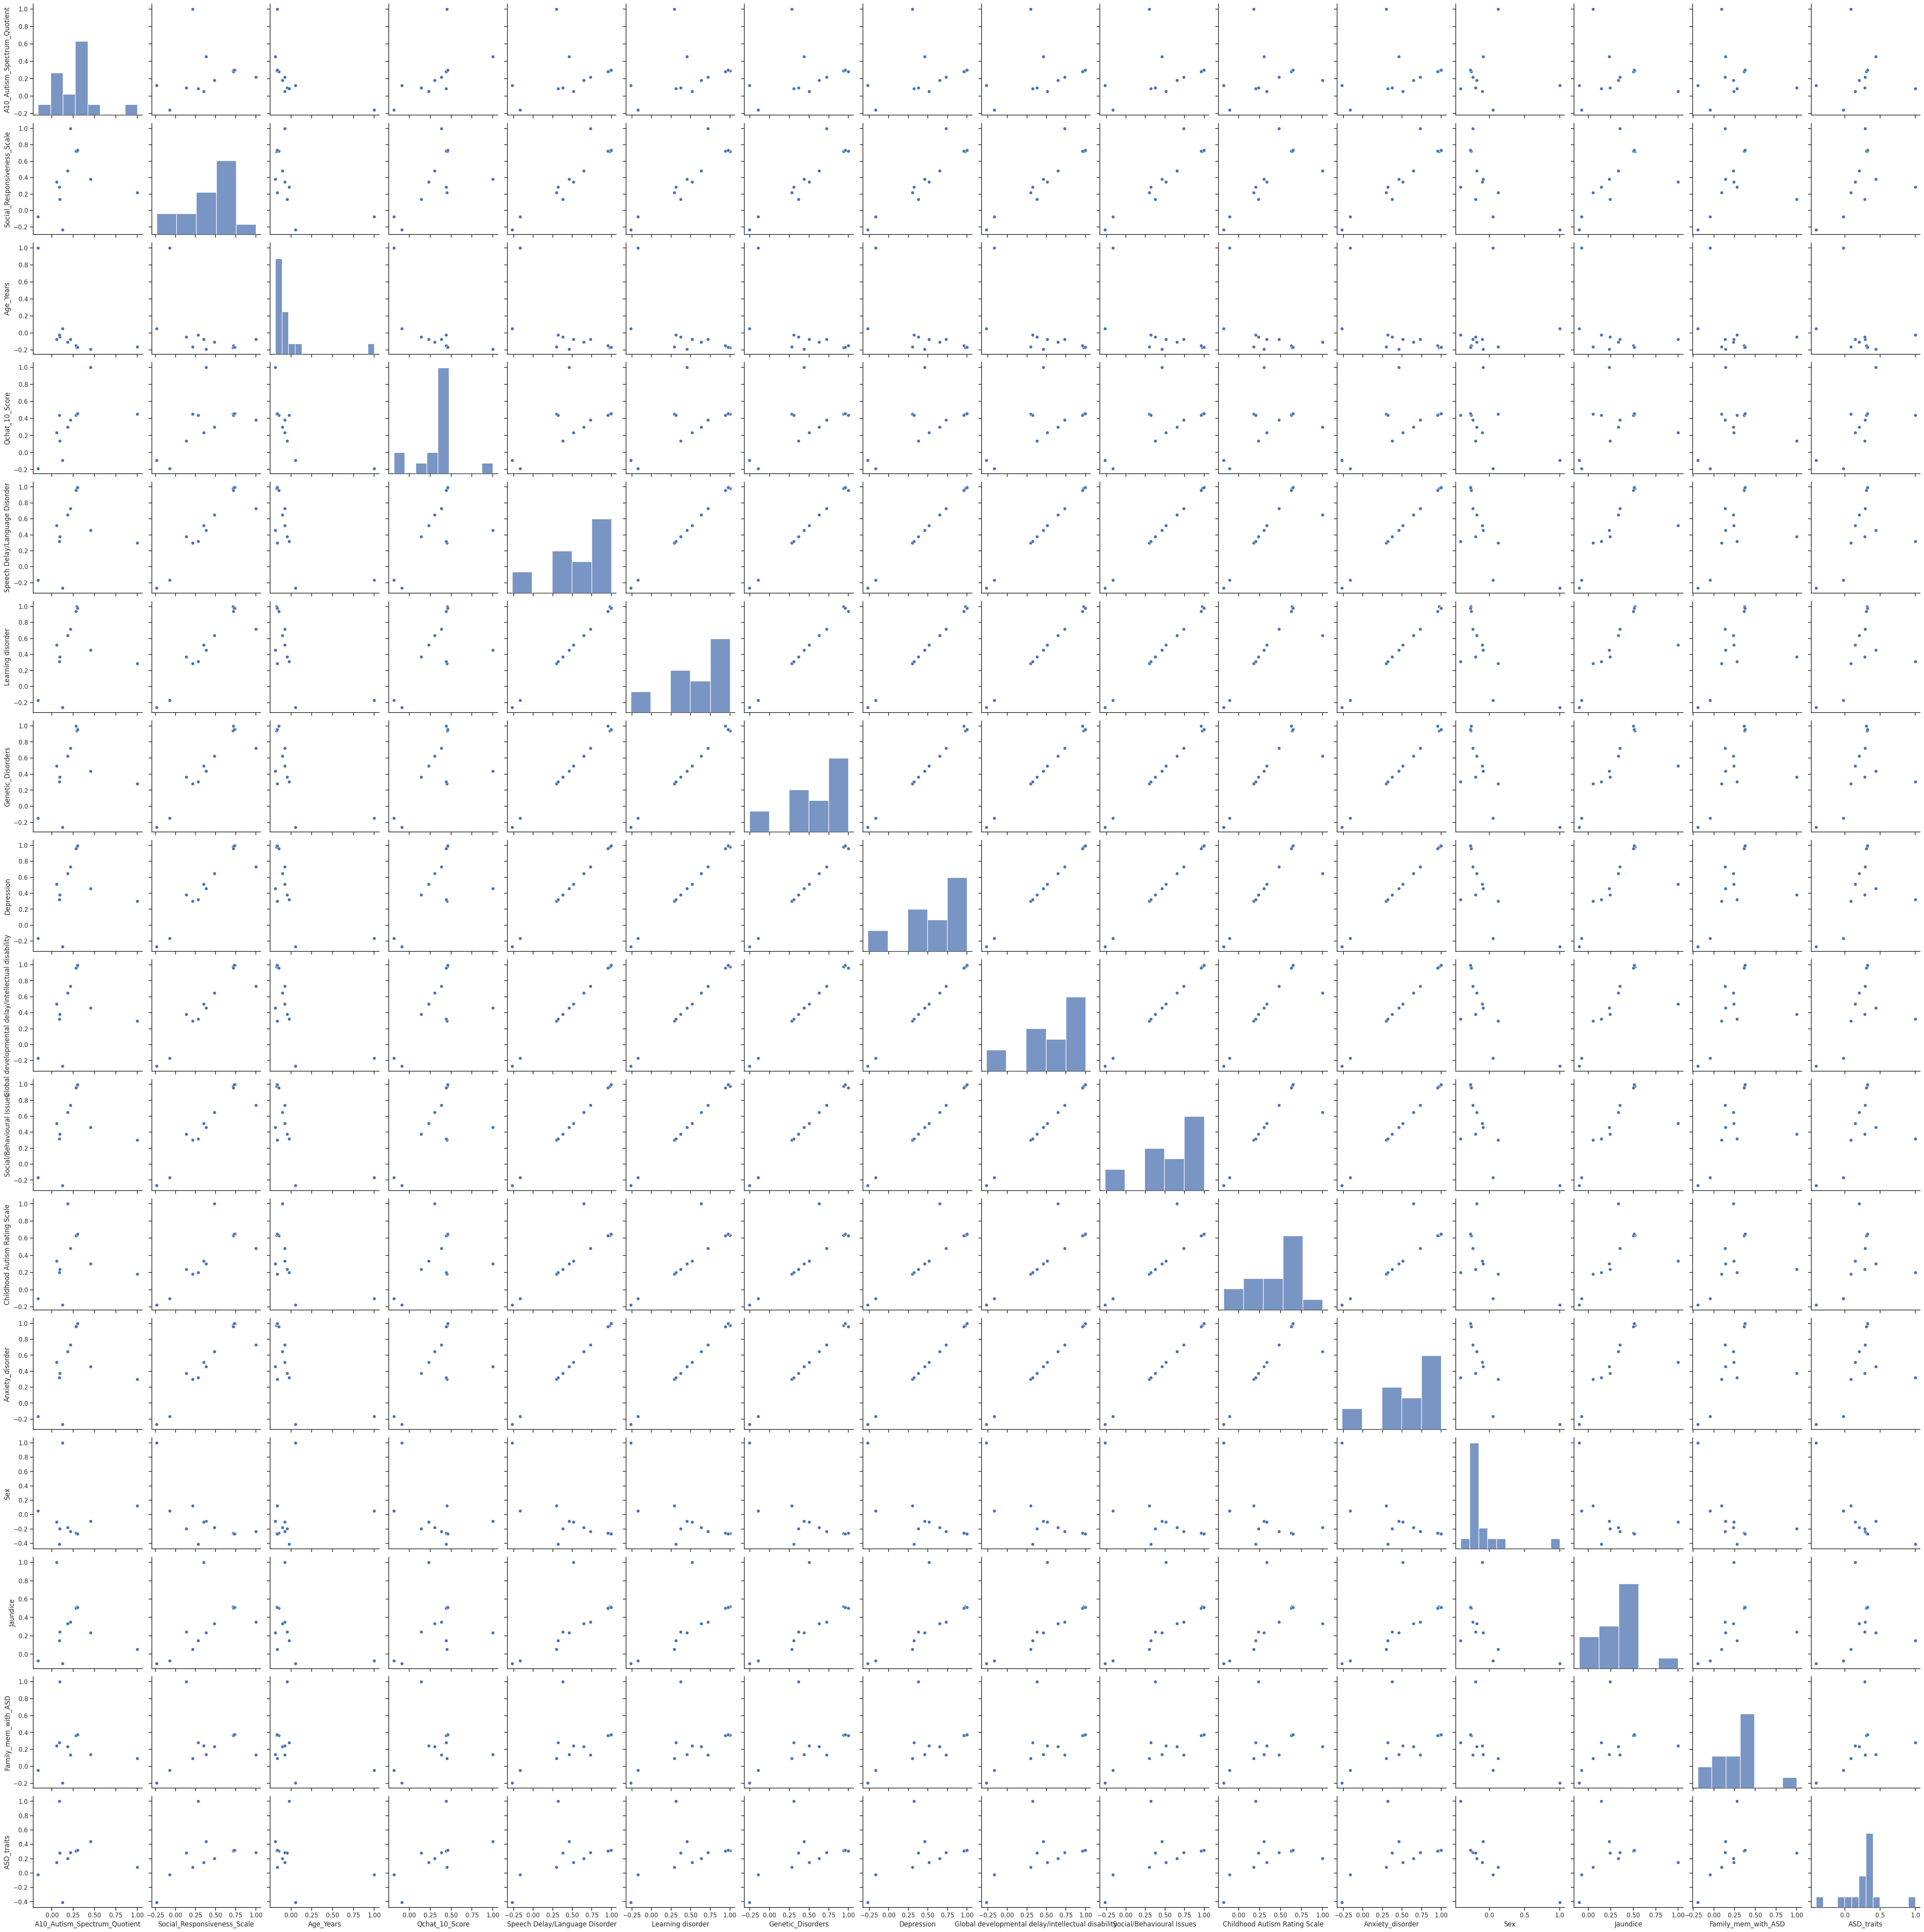

In [18]:
sns.set(style='ticks')
g = sns.pairplot(df_to_plot.corr(), kind='scatter')
g.fig.set_size_inches(50, 50)

# Display the plot
plt.show()

## References

- Dr. Natalie Engelbrecht ND RP - 2020 [The AQ-10 | Embrace Autism](https://embrace-autism.com/aq-10/)
- Carrie Allison Ph.D, Bonnie Auyeung Ph.D., Simon Baron-Cohen Ph.D. - 2012 [Toward Brief “Red Flags” for Autism Screening: The Short Autism Spectrum Quotient and the Short Quantitative Checklist in 1,000 Cases and 3,000 Controls](https://www.sciencedirect.com/science/article/abs/pii/S0890856711010331)
- Emily C. Taylor, Lucy A. Livingston, Rachel A. Clutterbuck, Punit Shah - 2020 [Psychometric concerns with the 10-item Autism-Spectrum Quotient (AQ10) as a measure of trait autism in the general population](https://www.cambridge.org/core/journals/experimental-results/article/psychometric-concerns-with-the-10item-autismspectrum-quotient-aq10-as-a-measure-of-trait-autism-in-the-general-population/2E2F8CF1ECEF65BBB867F49A65A2A3D4#)
- Bonnie Auyeung Ph.D., Simon Baron-Cohen Ph.D., Sally Wheelwright, Carrie Allison Ph.D. - 2007 [The Autism Spectrum Quotient: Children’s Version (AQ-Child)](https://docs.autismresearchcentre.com/papers/2008_Auyeung_etal_ChildAQ.pdf)